In [ ]:
!pip install category_encoders

In [ ]:
!pip install automl

     |████████████████████████████████| 71 kB 86 kB/s 


In [ ]:
!pip install mljar-supervised

     |████████████████████████████████| 111 kB 13.6 MB/s 
     |████████████████████████████████| 3.4 MB 38.9 MB/s 
     |████████████████████████████████| 11.3 MB 36.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 173.5 MB 10 kB/s 
     |████████████████████████████████| 2.0 MB 60.5 MB/s 
     |████████████████████████████████| 76.3 MB 1.3 MB/s 
     |████████████████████████████████| 62 kB 862 kB/s 
     |████████████████████████████████| 319 kB 47.5 MB/s 
     |████████████████████████████████| 366 kB 47.9 MB/s 
     |████████████████████████████████| 308 kB 46.9 MB/s 
     |████████████████████████████████| 25.3 MB 1.8 MB/s 
     |████████████████████████████████| 209 kB 52.1 MB/s 
     |████████████████████████████████| 80 kB 9.9 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 112 kB 65.7 MB/s 
     |████████████████████████████████| 149 kB 69.1 MB/s 
     |█████████████

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np
import category_encoders as c_enc
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML
%matplotlib inline

In [ ]:
data = pd.read_csv('./vgsales.csv', sep=',', encoding="utf-8")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
data = data.fillna(value="Unknown")

In [ ]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
df = data['Platform'].value_counts()
print(df)

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


In [ ]:
data_trns = data
enc = c_enc.CountEncoder(cols=['Genre','Publisher','Platform','Year'], normalize=True)
data_trns = enc.fit_transform(data)
data_trns.sort_values('Global_Sales', ascending=False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,0.079829,0.060730,0.141342,0.042355,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,0.005904,0.000843,0.053380,0.042355,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,0.079829,0.086034,0.075250,0.042355,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,0.079829,0.086215,0.141342,0.042355,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,0.005904,0.015845,0.089649,0.042355,11.27,8.89,10.22,1.00,31.37


In [ ]:
df = data_trns.sort_values('Global_Sales')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16597,16600,Spirits & Spells,0.049524,0.046692,0.053380,0.000301,0.01,0.00,0.00,0.0,0.01
16188,16191,Toro to Morimori,0.080070,0.086215,0.104772,0.041150,0.00,0.00,0.01,0.0,0.01
16187,16190,Jewel Quest II,0.057838,0.072418,0.035064,0.001566,0.00,0.01,0.00,0.0,0.01
16186,16189,BattleForge,0.057838,0.086215,0.041029,0.081395,0.00,0.01,0.00,0.0,0.01
16185,16188,Tantei Jinguuji Saburo: Hai to Diamond,0.073081,0.086215,0.077479,0.001566,0.00,0.00,0.01,0.0,0.01


In [ ]:
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df = data_trns[cols]
data_scl = data_trns
scl = MinMaxScaler()
df = pd.DataFrame(mmscale.fit_transform(df), columns = cols)
df.head()

NameError: ignored

In [ ]:
df_new = data_trns.drop(columns=['Name', 'Rank'])
selector = VarianceThreshold(threshold=0.15)
selector.fit(df_new)
for i in range(len(selector.variances_)):
    print(selector.variances_[i].round(2), '\t', df.columns[i])

0.0 	 NA_Sales
0.0 	 EU_Sales
0.0 	 JP_Sales
0.0 	 Other_Sales
0.67 	 Global_Sales


IndexError: ignored

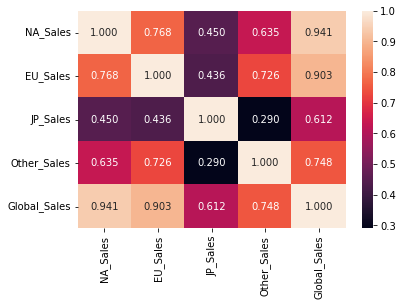

In [ ]:
sns.heatmap(df.corr(),annot = True, fmt = '.3f')

In [ ]:
# Функция для восстановления датафрейма на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=df.drop('Other_Sales', axis =1).columns)
    return res

X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(
df_new, df_new['Global_Sales'], test_size=0.2, random_state=1)
# Преобразуем массивы в DataFrame
X_train_basic_df = arr_to_df(X_train_basic)
X_test_basic_df = arr_to_df(X_test_basic)
X_train_basic_df.shape, X_test_basic_df.shapeb

((13278, 4), (3320, 4))

In [ ]:
train = df.copy()

In [ ]:
automl = AutoML()

In [ ]:
automl.fit(train[train.columns[:-1]], train['EU_Sales'])

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 0.615306 trained in 1.37 seconds
2_DecisionTree rmse 0.30605 trained in 10.36 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 0.260395 trained in 10.48 seconds
4_Default_NeuralNetwork rmse 0.021286 trained in 2.53 seconds
5_Default_RandomForest rmse 0.332865 trained in 6.68 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.021286 trained in 0.32 seconds
AutoML fit time: 69.21 seconds
AutoML best model: 4_Default_NeuralNetwork


AutoML()